# Project 2 - Ames Housing Data and Kaggle Challenge
## Revisited

When reviewing the various projects I completed during my time with General Assembly I found that Project 2, based on an existing Kaggle challenge, offered to most room for improvement. My notebooks were a mess: there was no clear organization to the repository as a whole and each individual notebook represented the full 'Data Science Process' (Cleaning through Model Deployment), each for a different list of features. 

While the project was not particularly complicated, the way in which I originally approached the project was: I now had a chance to improve upon the work I had done in a more succinct, cleaner manner. 

**Imports:**

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

**Reading in Data**

In [2]:
#reading in training and testing data
ames_df = pd.read_csv('../datasets/train.csv')
ames_test_df = pd.read_csv('../datasets/test.csv')

In [3]:
ames_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
print(f'The ames_df dataframe is {ames_df.shape} rows by columns')

The ames_df dataframe is (2051, 81) rows by columns


In [5]:
ames_test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [6]:
print(f'The ames_test_df dataframe is {ames_test_df.shape} rows by columns')

The ames_test_df dataframe is (878, 80) rows by columns


**Exploring the Data**

In [7]:
#listing all columns for ames_df: 
ames_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [8]:
ames_test_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [9]:
#renaming columns to preferred nomenclature 
ames_df.columns = ames_df.columns.str.strip().str.lower()
ames_df.columns = ames_df.columns.str.replace(' ', '_')
ames_df.columns[:5]

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage'], dtype='object')

In [10]:
#doing the same thing to our testing data:
ames_test_df.columns = ames_test_df.columns.str.strip().str.lower()
ames_test_df.columns = ames_test_df.columns.str.replace(' ', '_')
ames_test_df.columns[:5]

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage'], dtype='object')

In [11]:
np.round(ames_df.describe().T, 2).drop(['id', 'pid'])

,count,mean,std,min,25%,50%,75%,max
ms_subclass,2051.0,57.01,42.82,20.0,20.0,50.0,70.00,190.0
lot_frontage,1721.0,69.06,23.26,21.0,58.0,68.0,80.00,313.0
lot_area,2051.0,10065.21,6742.49,1300.0,7500.0,9430.0,11513.50,159000.0
overall_qual,2051.0,6.11,1.43,1.0,5.0,6.0,7.00,10.0
overall_cond,2051.0,5.56,1.10,1.0,5.0,5.0,6.00,9.0
year_built,2051.0,1971.71,30.18,1872.0,1953.5,1974.0,2001.00,2010.0
year_remod/add,2051.0,1984.19,21.04,1950.0,1964.5,1993.0,2004.00,2010.0
mas_vnr_area,2029.0,99.70,174.96,0.0,0.0,0.0,161.00,1600.0
bsmtfin_sf_1,2050.0,442.30,461.20,0.0,0.0,368.0,733.75,5644.0
bsmtfin_sf_2,2050.0,47.96,165.00,0.0,0.0,0.0,0.00,1474.0


- Reviewing the above table, we see that there's an outlier/error in 'Garage Yr Blt', a value of 2207.0, apart from this, none of the other values standout.

In [12]:
ames_df.loc[ames_df['garage_yr_blt'] == 2207]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1699,2261,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,267300


- The home was build in 2007 so I am going to replace the current 'Garage Yr Blt' value with 2007.

In [13]:
ames_df.loc[1699, ['garage_yr_blt']] = 2007

#https://stackoverflow.com/questions/23307301/replacing-column-values-in-a-pandas-dataframe
#df.loc[<row selection>, <column selection>]

In [14]:
ames_df[ames_df["id"] == 2261]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1699,2261,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2007.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,267300


**Exploratory Data Analysis**

In [15]:
ames_df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [16]:
ames_df['ms_subclass'].value_counts().sort_index()

20     770
30     101
40       4
45      11
50     198
60     394
70      90
75      16
80      86
85      28
90      75
120    132
150      1
160     88
180     11
190     46
Name: ms_subclass, dtype: int64

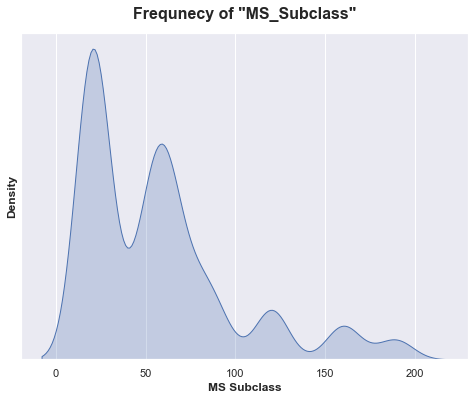

In [17]:
plt.figure(figsize = (8, 6))

plt.title('Frequnecy of "MS_Subclass"',
          fontsize = 16,
          fontweight = 'bold',
          y = 1.025)

sns.kdeplot(x = 'ms_subclass', shade = 'fill', data = ames_df)

plt.xlabel(xlabel = 'MS Subclass',
           fontweight = 'bold')
plt.ylabel(ylabel = 'Density',
           fontweight = 'bold')

plt.yticks([]);

In [19]:
ames_df['lot_frontage'].value_counts().sort_values(ascending = False)

60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
        ... 
153.0      1
25.0       1
33.0       1
124.0      1
195.0      1
Name: lot_frontage, Length: 118, dtype: int64

**Additional Data Visualizations**

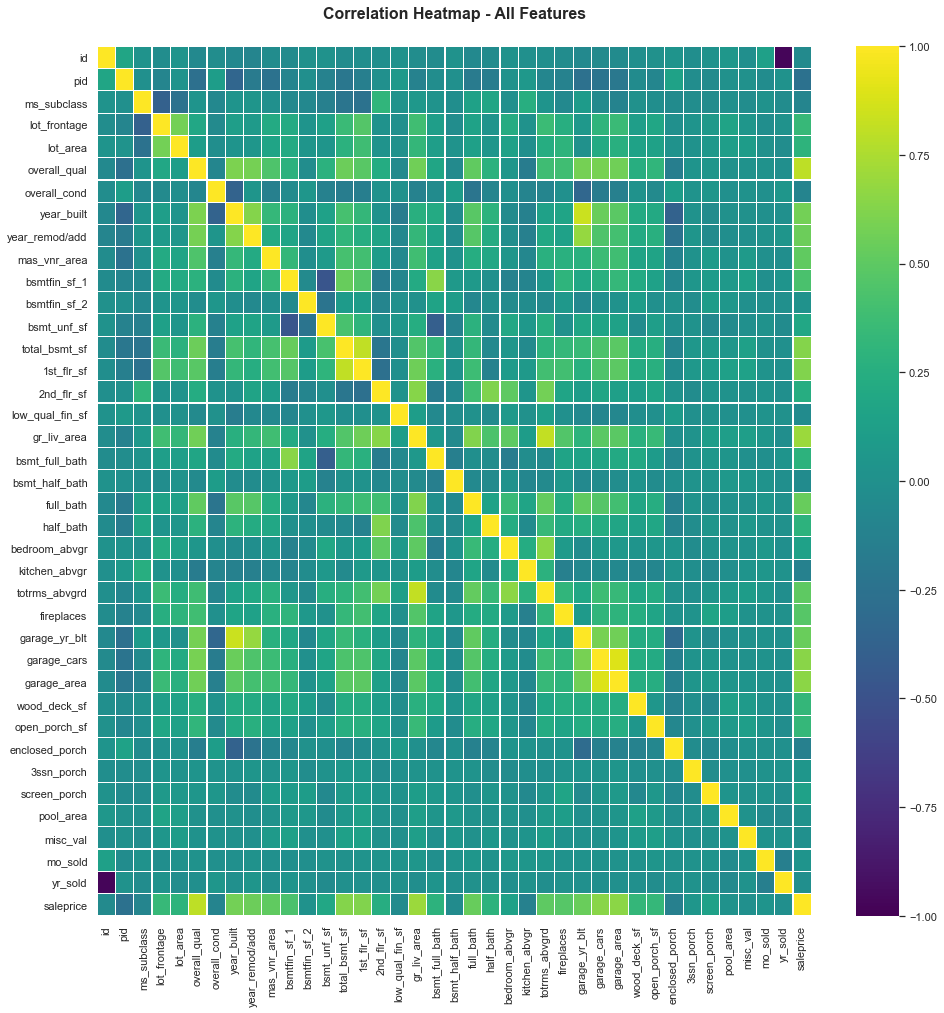

In [15]:
plt.figure(figsize = (16, 16))
plt.title('Correlation Heatmap - All Features',
          fontsize = 16,
          fontweight = 'bold',
          y = 1.025)
sns.heatmap(ames_df.corr(),
            #annot = True,
            fmt = '.2f',
            linewidth = .1,
            vmin = -1,
            vmax = 1,
            cmap = 'viridis');

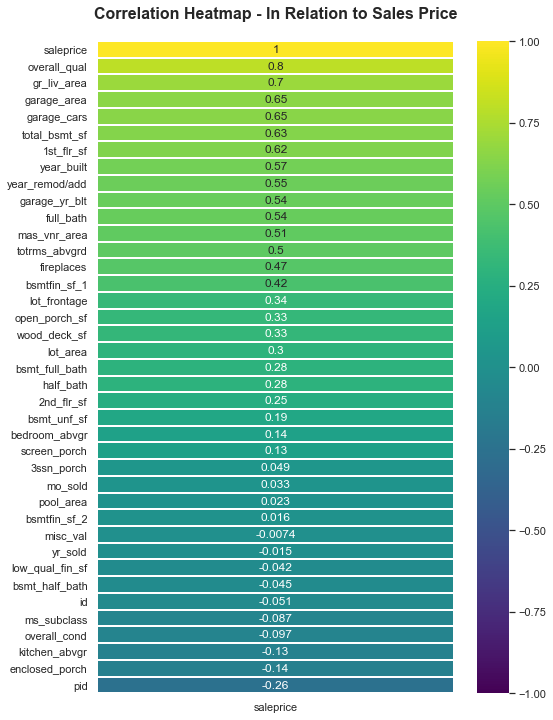

In [16]:
plt.figure(figsize = (8, 12))
plt.title('Correlation Heatmap - In Relation to Sales Price',
          fontsize = 16,
          fontweight = 'bold',
          y = 1.025)
sns.heatmap(ames_df.corr()[['saleprice']].sort_values('saleprice', ascending = False),
            vmin = -1,
            vmax = 1,
            annot = True,
            linewidths = 1,
            cmap='viridis');

In [17]:
#sns.pairplot(ames_df)

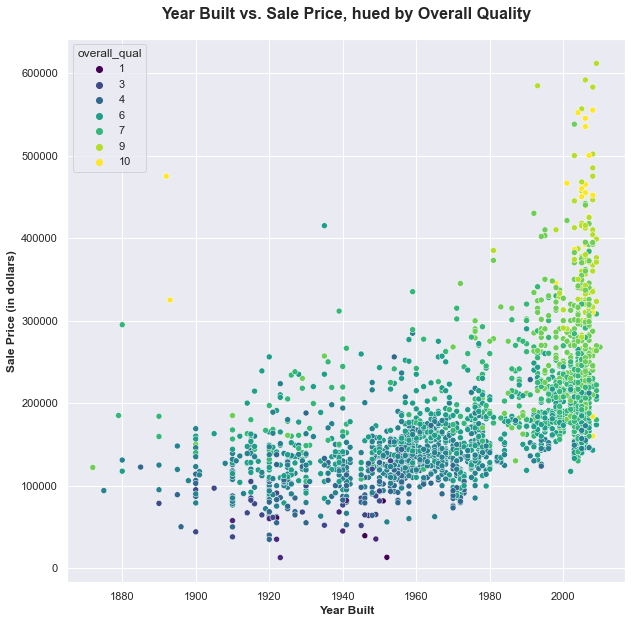

In [59]:
plt.figure(figsize = (10, 10))

plt.title('Year Built vs. Sale Price, hued by Overall Quality',
          fontsize = 16,
          fontweight = 'bold',
          y = 1.025)

sns.scatterplot(x = ames_df['year_built'],
                y = ames_df['saleprice'],
                hue = ames_df['overall_qual'],
                palette = 'viridis')

plt.xlabel('Year Built',
           fontweight = 'bold')
plt.ylabel('Sale Price (in dollars)',
           fontweight = 'bold')

plt.show()

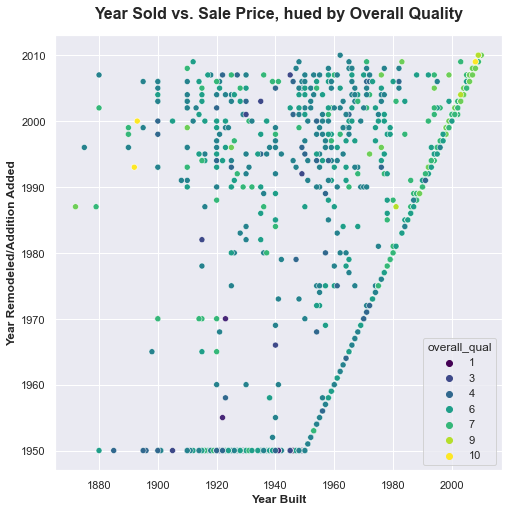

In [60]:
plt.figure(figsize = (8, 8))

plt.title('Year Sold vs. Sale Price, hued by Overall Quality',
          fontsize = 16,
          fontweight = 'bold',
          y = 1.025)

sns.scatterplot(x = ames_df['year_built'],
                y = ames_df['year_remod/add'],
                hue = ames_df['overall_qual'],
                palette = 'viridis')

plt.xlabel('Year Built',
           fontweight = 'bold')
plt.ylabel('Year Remodeled/Addition Added',
           fontweight = 'bold')

plt.show()

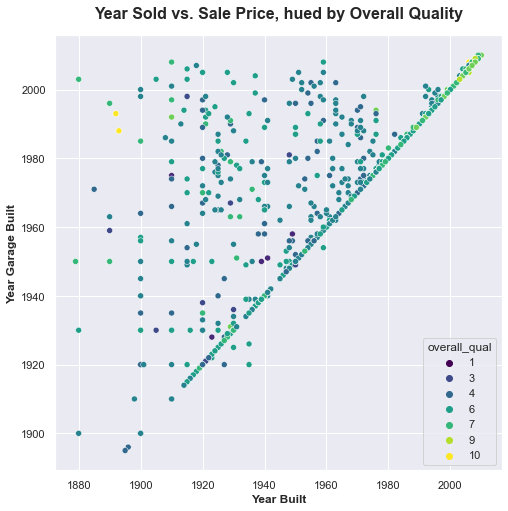

In [61]:
plt.figure(figsize = (8, 8))

plt.title('Year Sold vs. Sale Price, hued by Overall Quality',
          fontsize = 16,
          fontweight = 'bold',
          y = 1.025)

sns.scatterplot(x = ames_df['year_built'],
                y = ames_df['garage_yr_blt'],
                hue = ames_df['overall_qual'],
                palette = 'viridis')

plt.xlabel('Year Built',
           fontweight = 'bold')
plt.ylabel('Year Garage Built',
           fontweight = 'bold')

plt.show()

- There are several instances where the property was first a Garage and then a domicile (Home) was built.

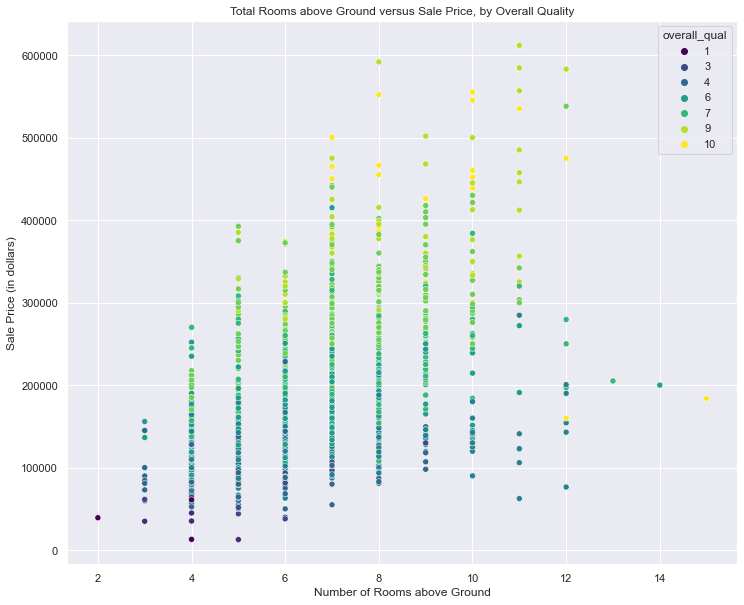

In [66]:
plt.figure(figsize = (12, 10))

plt.title('Total Rooms above Ground versus Sale Price, by Overall Quality')

sns.scatterplot(x = ames_df['totrms_abvgrd'],
                y = ames_df['saleprice'],
                hue = ames_df['overall_qual'],
                palette = 'viridis')

plt.xlabel('Number of Rooms above Ground')
plt.ylabel('Sale Price (in dollars)')

plt.show()

In [19]:
# __STOPPED__

**Checking Null Values**

In [20]:
ames_df.isna().sum().sort_values(ascending = False)[0:30]

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_cars          1
mo_sold              0
sale_type            0
full_bath            0
half_bath            0
dtype: int64

In [21]:
ames_df = pd.get_dummies(ames_df, columns = ames_df.select_dtypes('object').columns, dummy_na = True)
ames_df

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,ms_zoning_nan,street_Grvl,street_Pave,street_nan,alley_Grvl,alley_Pave,alley_nan,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,lot_shape_nan,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,land_contour_nan,utilities_AllPub,utilities_NoSeWa,utilities_NoSewr,utilities_nan,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,lot_config_nan,land_slope_Gtl,land_slope_Mod,land_slope_Sev,land_slope_nan,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,neighborhood_nan,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_1_nan,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,condition_2_nan,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,bldg_type_nan,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,house_style_nan,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_style_nan,roof_matl_ClyTile,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,roof_matl_nan,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_1st_nan,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,exterior_2nd_nan,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,mas_vnr_type_nan,exter_qual_Ex,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,exter_qual_nan,exter_cond_Ex,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,exter_cond_nan,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,foundation_nan,bsmt_qual_Ex,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,bsmt_qual_nan,bsmt_cond_Ex,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_Po,bsmt_cond_TA,bsmt_cond_nan,bsmt_exposure_Av,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmt_exposure_nan,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_1_nan,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,bsmtfin_type_2_nan,heating_GasA,he

**Saving to .csv Files**

In [22]:
ames_df.to_csv('../datasets/train_clean.csv',
               index = False)

In [23]:
ames_test_df.to_csv('../datasets/test_clean.csv',
                    index = False)